# Whitening and band-pass filtering

In this notebook, we'll go over a few basic tools for signal processing: whitening and band-pass filterting

## Download some data

Let's grab the data around GW150914 

In [6]:
# -- For google co-lab
# ! pip install -q pycbc gwpy

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from gwpy.timeseries import TimeSeries

t0 = 1126259462.4  
dt = 0.2
strain = TimeSeries.fetch_open_data('L1', t0-14, t0+14, cache=False)

## Plot the raw data in the time and frequency domains

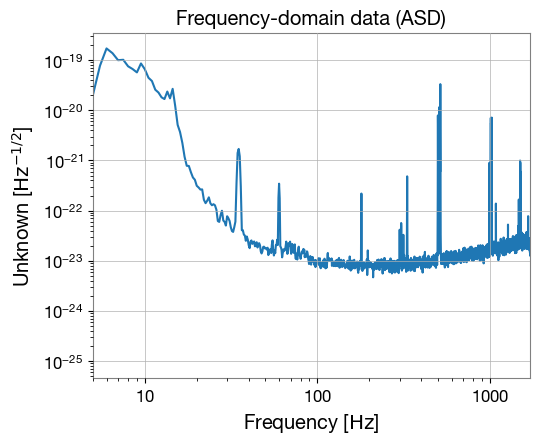

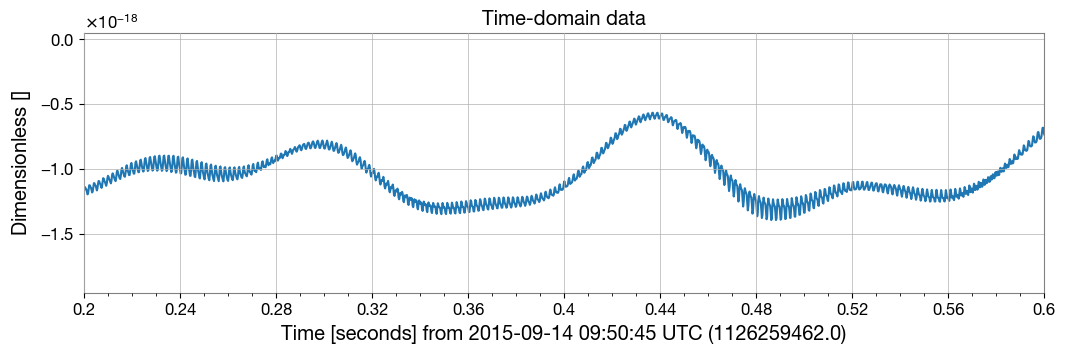

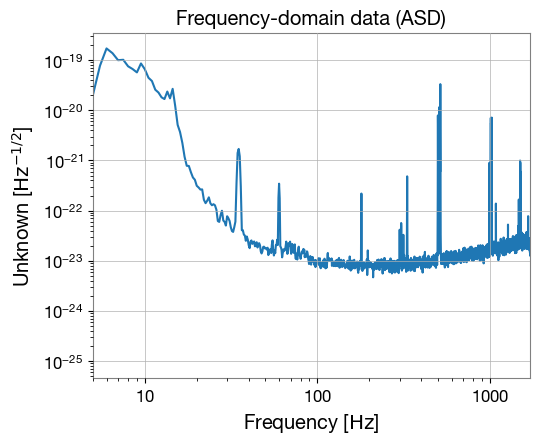

In [8]:
# -- plot the data in time and frequency domains
strain.plot(xlim = (t0-dt, t0+dt), title='Time-domain data')
strain.asd(fftlength=2).plot(xlim=(5,1700), title='Frequency-domain data (ASD)')

## Raw data are dominated by low-frequency noise

Notice that the ASD peaks around 6 Hz, so the noise is dominated by this low frequency noise.  In the time-domain plot, you can see this as the large, "slow" wiggles in the plot.  So, in the time domain plot we just see noise - we can't see any signal yet!  We'll need to suppress the low frequency noise if we want to see the signal.

## Whiten the data

"Whitening" is a process that adjusts data to have roughly equal amounts of power at each frequency.  This will tend to suppress places with high noise, and highlight places with low noise.  This is helpful for finding signals, because frequencies with low noise are where the instrument is most sensitive.  

(0.001, 1)

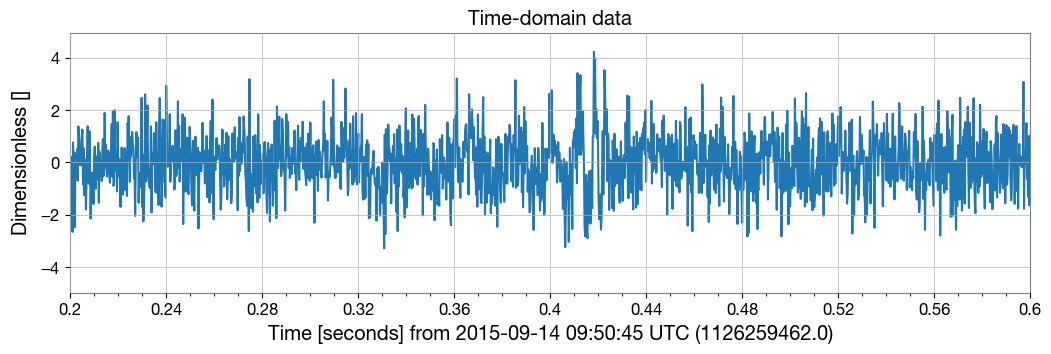

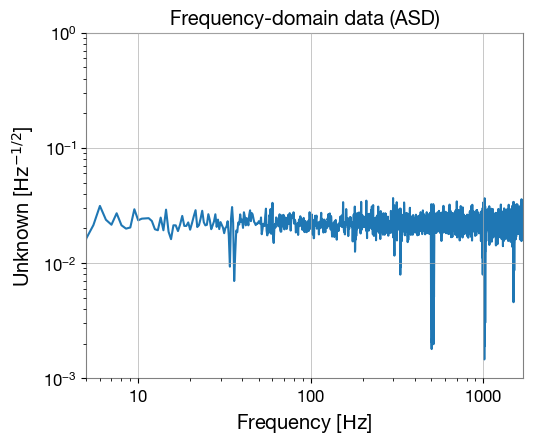

In [9]:
white_data = strain.whiten()
white_data.plot(xlim = (t0-dt, t0+dt), title='Time-domain data')
white_data.asd(fftlength=2).plot(xlim=(5,1700), title='Frequency-domain data (ASD)')
plt.ylim(1e-3,1)

## Whitening the data suppresses excess noise

In the plots above, notice the ASD is now mostly flat - the whitened data has roughly equal power at all frequencies.  This is actually the definition of "white" noise.  In the time domain, you can now see hints of the signal around the middle of the plot

## Band-pass the data

Band-passing is a process that removes noise (and signal) outside of a given frequency band.  Here, we will filter the data with a bandpass of 40 Hz to 400 Hz.  Noise in the band (between 40 and 400 Hz) is "passed" through the filter, and kept.  Noise outside the band is removed.

(0.001, 1)

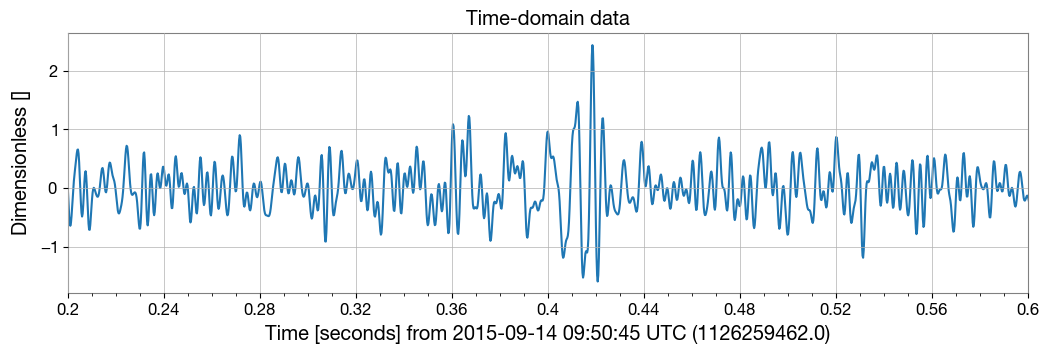

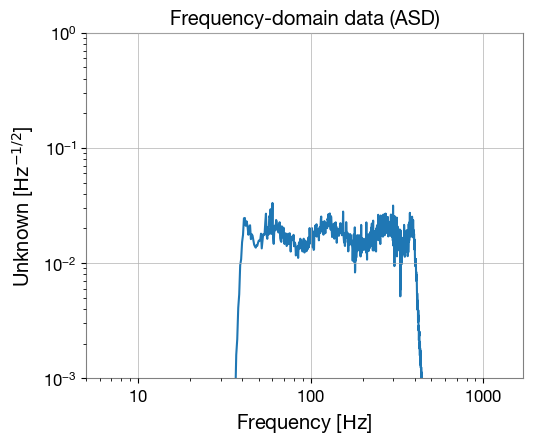

In [10]:
bp_data = white_data.bandpass(40, 400)
bp_data.plot(xlim = (t0-dt, t0+dt), title='Time-domain data')
bp_data.asd(fftlength=2).plot(xlim=(5,1700), title='Frequency-domain data (ASD)')
plt.ylim(1e-3,1)

## Now you can see the signal!

In the time-domain plot above, the whitened, band-passed data shows the signal in the middle of the plot.  In the ASD, notice that noise and signal outside the 40-400 Hz pass band has been suppressed.

## How is this used?

For "real" searches for signals, researchers don't typically look at data in the time-domain - that's not a sensitive way to find signals.  However, whatever algorithm is used to find signals, suppressing excess noise is always an important step.  Typically, both whitening and band-pass filtering are used as steps in any analysis, in order to focus the analysis on frequency bands that are most sensitive to the target signal.

##  Check questions

1. In the raw data, what frequency has the highest level of noise, as seen in the ASD?  What frequency is the most sensitive (e.g. has the lowest level of noise).

1. Here, we used a bandpass from 40 - 400 Hz.  Why might an analysis wish to focus on this band?

1. In the raw, time-domain data, some small wiggles are visible, at a rate of 10 cycles per 0.02 seconds.  Can you see these wiggles?  What frequency does this wiggle rate correspond to?  Can you see a feature in the ASD that corresponds to these wiggles?

## Practice with python

1. Here, we whitened, bandpassed, and plotted the Livingston (L1) data for GW150914.  See if you can do the same time with the Hanford (H1) data instead.

1. You can experiment more with whitening and bandpass filtering in the [signal processing tutorial app](https://share.streamlit.io/jkanner/streamlit-audio/main/app.py).

